# Introduction to the Dataset

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
f = open('US_births_1994-2003_CDC_NCHS.csv','r')
births = f.read()
new_line = births.split('\n')
new_line[:10]

['year,month,date_of_month,day_of_week,births',
 '1994,1,1,6,8096',
 '1994,1,2,7,7772',
 '1994,1,3,1,10142',
 '1994,1,4,2,11248',
 '1994,1,5,3,11053',
 '1994,1,6,4,11406',
 '1994,1,7,5,11251',
 '1994,1,8,6,8653',
 '1994,1,9,7,7910']

# Coverting Data into a List of Lists

In [2]:
def read_csv(input):
    string = input.read()
    new_line_string = string.split('\n')
    string_list = new_line_string[1:]
    final_list = []
    for each in string_list:
        int_fields = []
        string_fields = each.split(',')
        for value in string_fields:
            int_fields.append(int(value))
        final_list.append(int_fields)
        
    return final_list

f = open('US_births_1994-2003_CDC_NCHS.csv','r')
cdc_list = read_csv(f)
cdc_list[:10]

[[1994, 1, 1, 6, 8096],
 [1994, 1, 2, 7, 7772],
 [1994, 1, 3, 1, 10142],
 [1994, 1, 4, 2, 11248],
 [1994, 1, 5, 3, 11053],
 [1994, 1, 6, 4, 11406],
 [1994, 1, 7, 5, 11251],
 [1994, 1, 8, 6, 8653],
 [1994, 1, 9, 7, 7910],
 [1994, 1, 10, 1, 10498]]

# Calculating Number of Births each Month

In [3]:
def month_births(list_of_lists):
    births_per_month = {}
    for each in list_of_lists:
        month = each[1]
        births = each[4]
        if month in births_per_month:
            births_per_month[month] += births
        else:
            births_per_month[month] = births
    return births_per_month

cdc_month_births = month_births(cdc_list)
cdc_month_births

{1: 3232517,
 2: 3018140,
 3: 3322069,
 4: 3185314,
 5: 3350907,
 6: 3296530,
 7: 3498783,
 8: 3525858,
 9: 3439698,
 10: 3378814,
 11: 3171647,
 12: 3301860}

# Calculating Number of Births Each Day of the Week

In [4]:
def dow_births(list_of_lists):
    day_births = {}
    for each in list_of_lists:
        day_number = each[3]
        births = each[4]
        if day_number in day_births:
            day_births[day_number] += births
        else:
            day_births[day_number] = births
    return day_births

cdc_day_births = dow_births(cdc_list)
cdc_day_births

{1: 5789166,
 2: 6446196,
 3: 6322855,
 4: 6288429,
 5: 6233657,
 6: 4562111,
 7: 4079723}

# Creating a More General Function

In [5]:
def calc_counts(data, column):
    column_births = {}
    for each in data:
        column_data = each[column]
        births = each[4]
        if column_data in column_births:
            column_births[column_data] += births
        else:
            column_births[column_data] = births
    return column_births

cdc_year_births = calc_counts(cdc_list, 0)
cdc_month_births = calc_counts(cdc_list, 1)
cdc_dom_births = calc_counts(cdc_list, 2)
cdc_dow_births = calc_counts(cdc_list, 3)

In [6]:
cdc_year_births

{1994: 3952767,
 1995: 3899589,
 1996: 3891494,
 1997: 3880894,
 1998: 3941553,
 1999: 3959417,
 2000: 4058814,
 2001: 4025933,
 2002: 4021726,
 2003: 4089950}

In [7]:
cdc_dom_births

{1: 1276557,
 2: 1288739,
 3: 1304499,
 4: 1288154,
 5: 1299953,
 6: 1304474,
 7: 1310459,
 8: 1312297,
 9: 1303292,
 10: 1320764,
 11: 1314361,
 12: 1318437,
 13: 1277684,
 14: 1320153,
 15: 1319171,
 16: 1315192,
 17: 1324953,
 18: 1326855,
 19: 1318727,
 20: 1324821,
 21: 1322897,
 22: 1317381,
 23: 1293290,
 24: 1288083,
 25: 1272116,
 26: 1284796,
 27: 1294395,
 28: 1307685,
 29: 1223161,
 30: 1202095,
 31: 746696}

# Finding Min and Max Births for Time Period

In [8]:
def min_max_births(data, extra):
    for key in data:
        min = data[key]
        min_key = key
        max = data[key]
        max_key = key
        break
    for key in data:
        if data[key] < min:
            min = data[key]
            min_key = key
        if data[key] > max:
            max = data[key]
            max_key = key
    print('Min Births is ' + str(min) + ' in ' + str(min_key) + extra)
    print('Max Births is ' + str(max) + ' in ' + str(max_key) + extra)
    

min_max_births(cdc_year_births,'')
        

Min Births is 3880894 in 1997
Max Births is 4089950 in 2003


In [9]:
min_max_births(cdc_month_births,'nd Month')

Min Births is 3018140 in 2nd Month
Max Births is 3525858 in 8nd Month


In [10]:
min_max_births(cdc_dom_births, ' Day of Month')

Min Births is 746696 in 31 Day of Month
Max Births is 1326855 in 18 Day of Month


In [11]:
min_max_births(cdc_dow_births, ' Day of Week')

Min Births is 4079723 in 7 Day of Week
Max Births is 6446196 in 2 Day of Week


# Change in Number of Births on Saturday Over the Years

In [29]:
# dow:6 is saturday

# Method 1
def births_year_sat(list_of_lists):
    sat_year_births = {}
    for each in list_of_lists:
        year = each[0]
        day_number = each[3]
        births = each[4]
        if year in sat_year_births:
            if day_number == 6:
                sat_year_births[year] += births
        else:
            sat_year_births[year] = births
    return sat_year_births

cdc_sat_year_births = births_year_sat(cdc_list)
cdc_sat_year_births

{1994: 474732,
 1995: 467408,
 1996: 463944,
 1997: 459189,
 1998: 461989,
 1999: 458148,
 2000: 469794,
 2001: 461365,
 2002: 453560,
 2003: 455228}

[1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003]
Number of Births on Saturdays in the Year 1994 : 474732
Number of Births on Saturdays in the Year 1995 : 459580
Number of Births on Saturdays in the Year 1996 : 456261
Number of Births on Saturdays in the Year 1997 : 450840
Number of Births on Saturdays in the Year 1998 : 453776
Number of Births on Saturdays in the Year 1999 : 449985
Number of Births on Saturdays in the Year 2000 : 469794
Number of Births on Saturdays in the Year 2001 : 453928
Number of Births on Saturdays in the Year 2002 : 445770
Number of Births on Saturdays in the Year 2003 : 447445


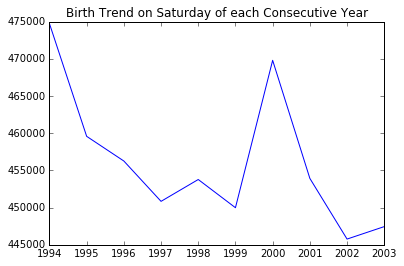

In [31]:
# Method 2
def sat_per_year(data):
    births_sat = {}
    i = 0
    year = [1994,1995,1996,1997,1998,1999,2000,2001,2002,2003]
    print(year)
    for each in data:
        if each[0] in births_sat and each[3] == 6:
            births_sat[each[0]] += each[4]
        elif each[3] == 6:
            births_sat[each[0]] = each[4]
    births_diff_sat = [births_sat[1994+i] for i in range(0,10)]
    for each in births_diff_sat:
        print('Number of Births on Saturdays in the Year ' +  str(1994+i) +' : ' + str(each))
        i+=1
    birth_trend_sat = [0]
    for value in range(1, len(births_diff_sat)):
        diff = births_diff_sat[value] - births_diff_sat[value-1]
        birth_trend_sat.append(diff)
    plt.plot(births_diff_sat)
    plt.title('Number of Births on a Saturday of each Consecutive Year')
    plt.xticks(range(0,10),year)
    return birth_trend_sat
      
births_sat_per_year = sat_per_year(cdc_list)


From the graph, apart from the sudden spike in birth rate in 2000, there seems to be a decrease in the number of births on a saturday over the years.